In [1]:
import numpy as np
# calculating fidelity between two states using the kernel
from qiskit_aer import AerSimulator
#from qiskit.primitives import Sampler
from cutting_CompUncomp import cutting_CompUncomp
from qiskit_machine_learning.state_fidelities import ComputeUncompute

from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
import numpy as np

from qiskit import QuantumCircuit


from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 12345



In [2]:
## Dataset
# Example dataset: 2 samples, 16 features total (8 for x, 8 for y)

NUM_QUBITS = 8

dataset = np.array([
    np.random.rand(NUM_QUBITS),
    np.random.rand(NUM_QUBITS)
])
print(dataset)

[[0.27928586 0.66192911 0.52458888 0.10558806 0.34096172 0.99803567
  0.83815509 0.7399512 ]
 [0.81654119 0.08118005 0.35343896 0.4294585  0.26060208 0.43617191
  0.69362557 0.05350153]]


Manual kernel parameters: ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3]), ParameterVectorElement(x[4]), ParameterVectorElement(x[5]), ParameterVectorElement(x[6]), ParameterVectorElement(x[7])])


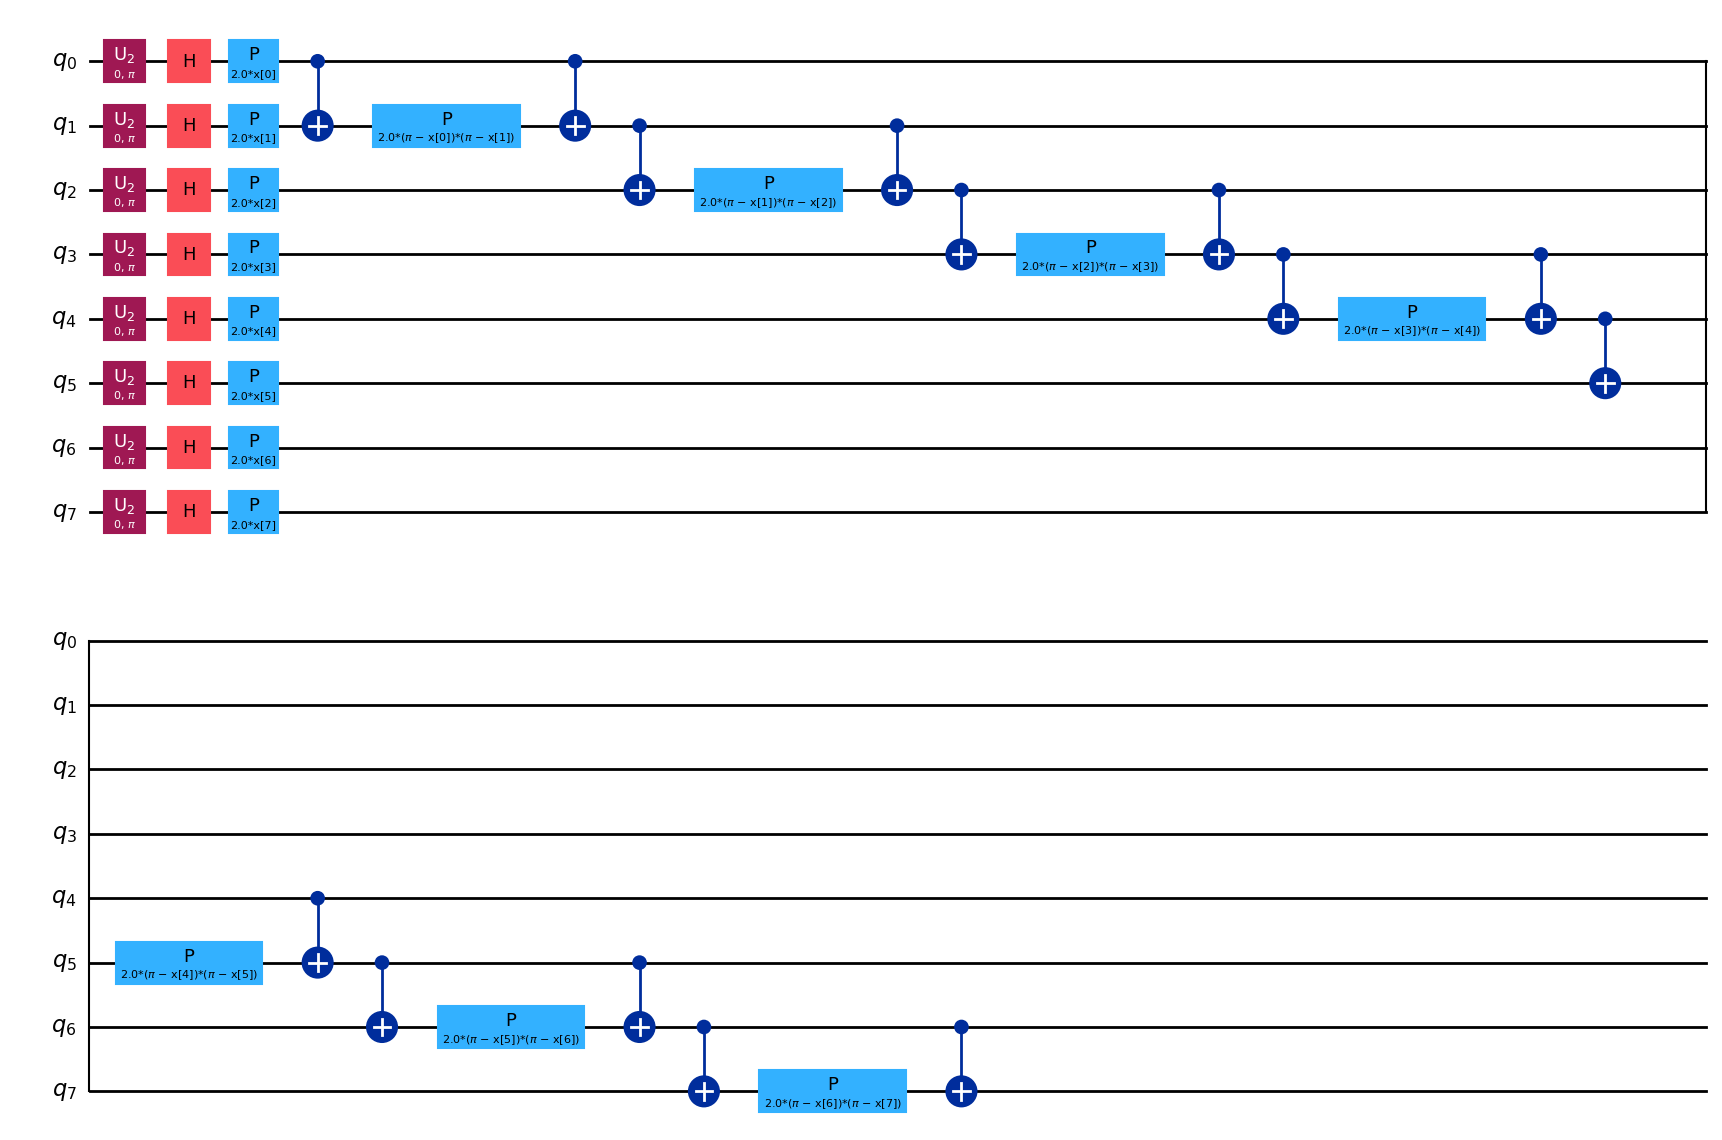

In [3]:
#generate circuit
 
manual_kernel = QuantumCircuit(NUM_QUBITS)

U_map = ZZFeatureMap(feature_dimension=NUM_QUBITS, reps=1, entanglement="linear")

for i in range(NUM_QUBITS):
    manual_kernel.h(i)


manual_kernel = manual_kernel.compose(U_map)

manual_kernel = manual_kernel.decompose()

print(f'Manual kernel parameters: {manual_kernel.parameters}')
manual_kernel.draw("mpl")

In [4]:
fidelity_computer = ComputeUncompute(sampler=Sampler())

fidelities = fidelity_computer.run(
    [manual_kernel],
    [manual_kernel],
    dataset[0],
    dataset[1]
)

print(fidelities.result().fidelities)

[1.0]


In [5]:
fidelity_computer = cutting_CompUncomp(sampler=Sampler())

operator = fidelity_computer.generate_operator(manual_kernel)

print(len(operator))

print(len(operator.paulis))


# manual_kernel.draw("mpl")

# circuits = fidelity_computer._construct_circuits(manual_kernel, manual_kernel)

# print(len(circuits))

fidelities = fidelity_computer._run(
    [manual_kernel],
    [manual_kernel],
    dataset[0],
    dataset[1]
)

print(fidelities)

256
256
the number of circuits is 1
the number of values is 1
AAAABBBB
Circuit 0: partitioned.
Circuit 0: cutting experiments generated.
Circuit 0: ISA transpiled subexperiments generated.
Circuits prepped.
A set of jobs sent to the Sampler have been processed.
Result retrieval time: 23.59872531890869s
All jobs sent to the Sampler have been processed.


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
#run this or above cell.
fidelity_computer = cutting_CompUncomp(sampler=Sampler())

fidelities = fidelity_computer.run(
    [manual_kernel],
    [manual_kernel],
    dataset[0],
    dataset[1]
)

print(fidelities.result().fidelities)

In [ ]:
fidelities_real = fidelities[0].real

print(fidelities_real)

In [ ]:
kernel_circuitdemo = fidelity_computer.create_fidelity_circuit(manual_kernel, manual_kernel)